### Answering interesting question on the tmdb movies dataset

In this document I will be answering three questions that I found it to be intersting, which are:
- What is the relationship between the passage of years on the profitability of the movies business?
- Does the length of the movie's title affect its popularity?
- What are the most repeated genres for the 100 highest-popularity movies?



In [498]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [499]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [500]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Question 1
#### What is the relationship between the passage of years on the profitability of the movies business?


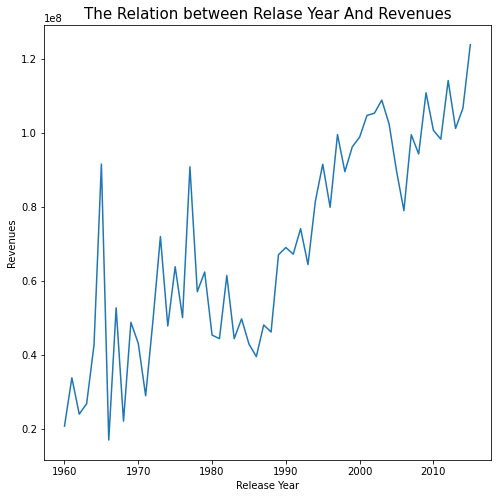

In [501]:
#drop movies with no specified revenue
new_df = df[df['revenue'] != 0]
#group movies by year and then calculate the average revenue for each group and then plot the result
new_df.groupby(['release_year'])['revenue'].mean().plot(x='release_year', figsize=(8,8));
plt.xlabel('Release Year', fontsize=10)
plt.ylabel('Revenues', fontsize=10)
plt.title('The Relation between Relase Year And Revenues', fontsize=15);

### Question 2
#### Does the length of the movie's title affect its popularity?


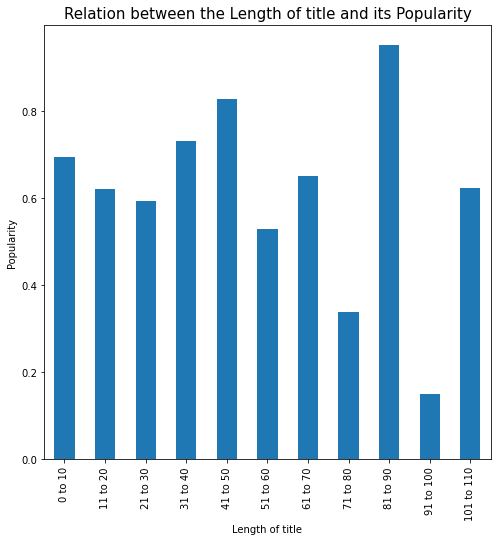

In [502]:
# store the length of every title in a new column
df['title_length'] = df['original_title'].str.len()

# categorize each title length to a range of 10 and store it in a new column
df['title_range'] = pd.cut(df['title_length'],[0,10,20,30,40,50,60,70,80,90,100,110])

# calculate the mean 'popularity' for each range of lengths and plot it
x = df.groupby(['title_range'])['popularity'].mean().plot.bar(figsize=(8,8));
x.set_xticklabels(['0 to 10','11 to 20','21 to 30','31 to 40','41 to 50','51 to 60','61 to 70','71 to 80','81 to 90','91 to 100','101 to 110'])
plt.xlabel('Length of title', fontsize=10)
plt.ylabel('Popularity', fontsize=10)
plt.title('Relation between the Length of title and its Popularity', fontsize=15);


### Question 3
#### What are the most repeated genres for the 100 highest-popularity movies?


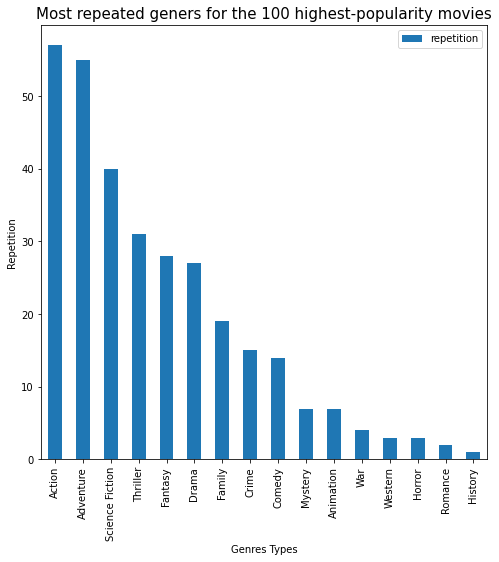

In [503]:
# create new df that is sorted in a descending order based on popularity
popularity_sorted_df = df.sort_values('popularity',ascending=False).reset_index()
# genres_list eventually  will contain unique genres with its repetition
genres_list = []


def count_genres(count):
    '''
    INPUT - count - the index of a row
    
    This function will take an index of a row and extract its genres to check
    if each one is contained in the genres_list or not and that is done in two 
    cases:
    1- if the type of genres alredy in genres_list:
        it will increse its repetition by one
    2- if the type of genres not in genres_list:
        it will append this new type and give it a repetition of one
    '''
    local_genres = popularity_sorted_df['genres'].str.split('|')[count]
    for h in local_genres:
        found = 0
        for g in genres_list:
            if h == g[0]:
                g[1] = g[1]+1
                found = 1
        if found == 0:
            genres_list.append([h,1])

# this loop will call the count_genres for the first 100 row
for count in range(0,100):
    count_genres(count)
    
# this will convert the list into dataframe and plot in a descending order
genres_df = pd.DataFrame(genres_list, columns = ['genres','repetition'])
genres_df.sort_values('repetition', ascending=False).plot(kind='bar', x='genres', figsize=(8,8));
plt.xlabel('Genres Types', fontsize=10)
plt.ylabel('Repetition', fontsize=10)
plt.title('Most repeated geners for the 100 highest-popularity movies', fontsize=15);